In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base_ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [3]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 82)

In [6]:
X.shape[1]

82

In [7]:
AR2_Ordinal = []
MAE_Ordinal = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Ordinal.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Ordinal.append(mae)

In [8]:
Ordinal = pd.DataFrame({'AR2_Ordinal': AR2_Ordinal, 'MAE_Ordinal': MAE_Ordinal})
Ordinal

,AR2_Ordinal,MAE_Ordinal
0,0.854177,15987.779803
1,0.904798,14944.185253
2,0.872746,16293.726441
3,0.888176,14474.873359
4,0.818616,15265.225966
5,0.896364,14804.464262
6,0.892965,15192.677743
7,0.901923,14024.948050
8,0.903380,14500.104185
9,0.887789,15272.014523


In [9]:
ordinal_drop1 = pd.read_csv('OrdinalDrop1.csv')

In [10]:
ordinal_drop1.shape

(2579, 83)

In [11]:
X2 = ordinal_drop1.drop(['SalePrice'], axis=1).values
y2 = ordinal_drop1.SalePrice.values

In [12]:
len(y2)

2579

In [13]:
X2.shape

(2579, 82)

In [14]:
X2.shape[1]

82

In [15]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X2,y2,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)



In [16]:
OrdinalDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
OrdinalDrop1

,AR2_Drop1,MAE_Drop1
0,0.889333,14896.708473
1,0.906353,14689.671015
2,0.907014,14934.760211
3,0.886009,15540.768417
4,0.905387,14645.814078
5,0.894683,15982.266733
6,0.911244,15036.884090
7,0.903799,15933.492563
8,0.906623,14144.467133
9,0.880638,15867.900191


In [17]:
ordinal_drop_IF = pd.read_csv('OrdinalDropIF.csv')

In [18]:
ordinal_drop_IF.shape

(2568, 83)

In [19]:
X3 = ordinal_drop_IF.drop(['SalePrice'], axis=1).values
y3 = ordinal_drop_IF.SalePrice.values

In [20]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [21]:
OrdinalDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
OrdinalDropIF

,AR2_DropIF,MAE_DropIF
0,0.902167,13931.853674
1,0.868724,15965.794630
2,0.912902,13784.132064
3,0.919159,14705.510185
4,0.896687,15546.632593
5,0.908743,14428.357811
6,0.896800,14077.100443
7,0.911731,14979.152040
8,0.910298,14270.182006
9,0.902517,14849.760770


In [22]:
box = pd.concat([Ordinal, OrdinalDrop1, OrdinalDropIF], axis=1)
box

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.854177,15987.779803,0.889333,14896.708473,0.902167,13931.853674
1,0.904798,14944.185253,0.906353,14689.671015,0.868724,15965.794630
2,0.872746,16293.726441,0.907014,14934.760211,0.912902,13784.132064
3,0.888176,14474.873359,0.886009,15540.768417,0.919159,14705.510185
4,0.818616,15265.225966,0.905387,14645.814078,0.896687,15546.632593
5,0.896364,14804.464262,0.894683,15982.266733,0.908743,14428.357811
6,0.892965,15192.677743,0.911244,15036.884090,0.896800,14077.100443
7,0.901923,14024.948050,0.903799,15933.492563,0.911731,14979.152040
8,0.903380,14500.104185,0.906623,14144.467133,0.910298,14270.182006
9,0.887789,15272.014523,0.880638,15867.900191,0.902517,14849.760770


In [23]:
box.describe()

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.886672,14931.536039,0.901564,14749.928293,0.901035,14722.591957
std,0.028218,683.764837,0.012868,634.804885,0.011178,621.650277
min,0.793788,13004.107310,0.858340,13498.731940,0.868724,13121.957822
25%,0.874665,14498.463213,0.894942,14270.489497,0.893568,14406.523985
50%,0.896100,14910.349219,0.903940,14751.429800,0.901618,14720.255169
75%,0.904873,15462.091312,0.910423,15172.796734,0.908802,15083.353616
max,0.924230,16337.421294,0.927820,16044.965746,0.929552,16456.548427


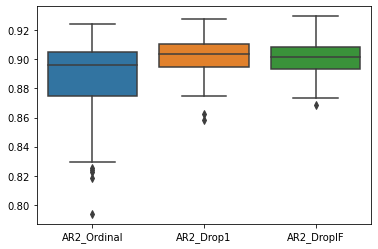

In [24]:
sns.boxplot(data=box[['AR2_Ordinal','AR2_Drop1','AR2_DropIF']]);

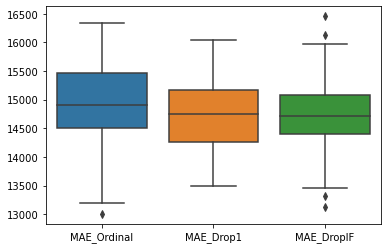

In [25]:
sns.boxplot(data=box[['MAE_Ordinal','MAE_Drop1','MAE_DropIF']]);